# Intro to Pandas
## Code-Along Examples

Here you have space to work through the code that addresses the prompts in the slide show. The prompts are repeated here for your convenience.


### Day 1
#### I. Create a DataFrame

1. Import Pandas and Numpy.
2. Make an array with 3 columns and 4 rows, with data values of 1-12.
3. Convert it to a DataFrame with columns named `['a', 'b', 'c']`.

In [12]:
import pandas as pd
import numpy as np

a = np.arange(1,13).reshape((4,3))
adf = pd.DataFrame(a, columns=['a', 'b', 'c'], index=['w','x','y','z'])
print(adf)

    a   b   c
w   1   2   3
x   4   5   6
y   7   8   9
z  10  11  12


#### II. View Indices of a DataFrame
4. Get the indices of DataFrame in previous example and print the data-type of the index. See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Index.html#pandas.Index).

In [5]:
print(adf.index)
print(adf.index.dtype)

RangeIndex(start=0, stop=4, step=1)
int64


#### III. Basic I/O

1. Load the file `'exoplanets_5250_EarthUnits.csv'` into a DataFrame called `exos`.
    - Extra: set the index to the leftmost column.
2. Write the DataFrame to a tab-separated text file (.txt). The name is up to you.

In [2]:
exos = pd.read_csv('exoplanets_5250_EarthUnits.csv', index_col=0)

In [3]:
exos.head(3)

,distance,star_mag,planet_type,discovery_yr,mass_ME,radius_RE,orbital_radius_AU,orbital_period_yr,eccentricity,detection_method
#name,,,,,,,,,,
11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,6169.2,12.096,1.29,0.892539,0.23,Radial Velocity
11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,4687.32,12.208,1.53,1.400000,0.08,Radial Velocity
14 Andromedae b,246.0,5.23133,Gas Giant,2008,1526.4,12.88,0.83,0.508693,0.00,Radial Velocity


In [18]:
exos.loc['55 Cancri e',['planet_type','mass_ME']]

planet_type    Super Earth
mass_ME               7.99
Name: 55 Cancri e, dtype: object

In [ ]:
exos.to_csv('exos_5250_EUnits.txt', sep='\t')

#### IV. Data Inspection

1. Call `.info()` off the exoplanets DataFrame from the previous example. Familiarize yourself with the specs that are included. Notice anything weird?
2. If nothing stuck out in #1, call `.describe()` on that DataFrame. 

In [17]:
exos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 11 Comae Berenices b to YZ Ceti d
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           5231 non-null   float64
 1   star_mag           5087 non-null   float64
 2   planet_type        5248 non-null   object 
 3   discovery_yr       5248 non-null   int64  
 4   mass_ME            5248 non-null   object 
 5   radius_RE          5248 non-null   object 
 6   orbital_radius_AU  4959 non-null   float64
 7   orbital_period_yr  5248 non-null   float64
 8   eccentricity       5248 non-null   float64
 9   detection_method   5248 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 451.0+ KB


In [18]:
exos.describe()

,distance,star_mag,discovery_yr,orbital_radius_AU,orbital_period_yr,eccentricity
count,5231.000000,5087.000000,5248.000000,4959.000000,5.248000e+03,5248.000000
mean,2167.800038,12.683997,2015.732470,6.959035,4.793331e+02,0.063948
std,3245.981933,3.108155,4.308133,138.701425,1.680765e+04,0.141423
min,4.000000,0.872000,1992.000000,0.004400,2.737850e-04,0.000000
25%,387.500000,10.939000,2014.000000,0.053000,1.259411e-02,0.000000
50%,1373.000000,13.543000,2016.000000,0.102700,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,0.284600,1.440109e-01,0.060000
max,27727.000000,44.610000,2023.000000,7506.000000,1.101370e+06,0.950000


#### V. Selection Syntax
1. Assign rows 25 through 35 of the exoplanets DataFrame to another DataFrame called `df2`.
2. Extract and print both the `'planet_type'` and `'mass_ME'` columns of `df2`.
3. Go back to the full exoplanets DataFrame, select rows where the `'discovery_yr'` is before 2007 and `'planet_type'` is not 'Gas Giant', and print only the `'planet_type'` column of that selection.


In [19]:
df2 = exos.iloc[25:35]
print(df2[['planet_type','mass_ME']])

                planet_type mass_ME
#name                              
51 Eridani b      Gas Giant     636
51 Pegasi b       Gas Giant  146.28
55 Cancri b       Gas Giant  264.13
55 Cancri c       Gas Giant   54.51
55 Cancri d       Gas Giant  1233.2
55 Cancri e     Super Earth    7.99
55 Cancri f       Gas Giant   44.84
61 Virginis b  Neptune-like     5.1
61 Virginis c  Neptune-like    18.2
61 Virginis d  Neptune-like    22.9


In [23]:
exos.loc[(exos['discovery_yr']<2007) & 
         (exos['planet_type'] != 'Gas Giant'),
         'planet_type']

#name
55 Cancri e              Super Earth
GJ 436 b                Neptune-like
GJ 581 b                Neptune-like
GJ 876 d                Neptune-like
HD 160691 d             Neptune-like
HD 190360 c             Neptune-like
HD 4308 b               Neptune-like
HD 49674 b              Neptune-like
HD 69830 b              Neptune-like
HD 69830 c              Neptune-like
HD 69830 d              Neptune-like
HD 99492 b              Neptune-like
OGLE-2005-BLG-169L b    Neptune-like
OGLE-2005-BLG-390L b    Neptune-like
PSR B1257+12 b           Terrestrial
PSR B1257+12 c           Super Earth
PSR B1257+12 d           Super Earth
Name: planet_type, dtype: object

#### VI. Bad Data Handling
1. The exoplanets DataFrame has space characters (`' '`) for missing values in the `'mass_ME'` & `'radius_RE'` columns. Use the .replace() method to replace `' '`  with `np.NaN` in-place. 
    - Extra: use the `.astype()` method to convert the data types of these columns to `'float64'` in-place. Check your results with `.info()`
2. Use the `.mask()` method to mask the `'eccentricity'` column wherever the data are exactly 0 (these are assumed values). The "Non-Null Count" for that column in info() should be smaller.

In [22]:
exos['mass_ME']=exos['mass_ME'].replace(' ', np.nan).astype('float64')
exos['radius_RE']=exos['radius_RE'].replace(' ', np.nan).astype('float64')

In [25]:
exos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 11 Comae Berenices b to YZ Ceti d
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           5231 non-null   float64
 1   star_mag           5087 non-null   float64
 2   planet_type        5248 non-null   object 
 3   discovery_yr       5248 non-null   int64  
 4   mass_ME            5227 non-null   float64
 5   radius_RE          5233 non-null   float64
 6   orbital_radius_AU  4959 non-null   float64
 7   orbital_period_yr  5248 non-null   float64
 8   eccentricity       5248 non-null   float64
 9   detection_method   5248 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 451.0+ KB


In [11]:
exos['eccentricity']=exos['eccentricity'].mask(exos['eccentricity']==0)

In [27]:
exos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 11 Comae Berenices b to YZ Ceti d
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           5231 non-null   float64
 1   star_mag           5087 non-null   float64
 2   planet_type        5248 non-null   object 
 3   discovery_yr       5248 non-null   int64  
 4   mass_ME            5227 non-null   float64
 5   radius_RE          5233 non-null   float64
 6   orbital_radius_AU  4959 non-null   float64
 7   orbital_period_yr  5248 non-null   float64
 8   eccentricity       1674 non-null   float64
 9   detection_method   5248 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 451.0+ KB


#### VII. Basic Operations
1. Calculate the median of all numeric columns in the exoplanets DataFrame.
2. Divide the `'mass_ME'` column by 317.8 & assign the result to `'mass_MJ'` (planet mass in Jupiter masses)

In [6]:
print(exos.median(numeric_only=True))

distance             1373.000000
star_mag               13.543000
discovery_yr         2016.000000
mass_ME                 8.470000
radius_RE               2.732800
orbital_radius_AU       0.102700
orbital_period_yr       0.034497
eccentricity            0.140000
dtype: float64


In [7]:
exos['mass_MJ']=exos['mass_ME']/317.8
exos['mass_MJ'].head()

#name
11 Comae Berenices b    19.412209
11 Ursae Minoris b      14.749276
14 Andromedae b          4.803021
14 Herculis b            8.143927
16 Cygni B b             1.781120
Name: mass_MJ, dtype: float64

#### VIII. Reorganizing Data
Let
`df1 = pd.DataFrame(np.random.randint(0,high=9,size=(4,3)), columns=['B','a','C'], index=['i','j','h','k'])` and
`df2 = pd.DataFrame(np.identity(3), columns=['B','C','D'], index=['k','l','m'])`.
1. Sort `df1` by index, by index again with `axis=1`, and then by the values of column `'C'`.
2. Concatenate `df1` and `df1`. What happens where the indices aren’t shared?

In [59]:
df1 = pd.DataFrame(np.random.randint(0,high=9,size=(4,3)), columns=['B','a','C'], index=['i','j','h','k'])
df2 = pd.DataFrame(np.identity(3), columns=['B','C','D'], index=['k','l','m'])

In [9]:
df1.sort_index()

,B,a,C
h,4,2,3
i,5,1,6
j,3,7,7
k,2,6,6


In [45]:
df1.sort_values(by='C')

,B,a,C
h,4,2,3
i,5,1,6
k,2,6,6
j,3,7,7


In [60]:
pd.concat([df1,df2], axis=0)

,B,a,C,D
i,5.0,5.0,3.0,NaN
j,5.0,0.0,1.0,NaN
h,7.0,3.0,7.0,NaN
k,4.0,7.0,6.0,NaN
k,1.0,NaN,0.0,0.0
l,0.0,NaN,1.0,0.0
m,0.0,NaN,0.0,1.0


### Day 2
#### X. GroupBy Objects
1. Group the exoplanets DataFrame by `'planet_type'` and assign the result to `grouped_pt`.
2. Print the mean `'mass_ME'` for each group in `grouped_pt` (this is 1 command).
3. **Challenge**\*: call the `.filter()` method on `grouped_pt` to remove any `'planet_type'` group with 5 or fewer members (\*I don’t expect most people to get this in the time available).

In [26]:
grouped_pt=exos.groupby('planet_type')

In [30]:
grouped_pt.head()

,distance,star_mag,planet_type,discovery_yr,mass_ME,radius_RE,orbital_radius_AU,orbital_period_yr,eccentricity,detection_method
#name,,,,,,,,,,
11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,6169.20,12.0960,1.290000,0.892539,0.23,Radial Velocity
11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,4687.32,12.2080,1.530000,1.400000,0.08,Radial Velocity
14 Andromedae b,246.0,5.23133,Gas Giant,2008,1526.40,12.8800,0.830000,0.508693,0.00,Radial Velocity
14 Herculis b,58.0,6.61935,Gas Giant,2002,2588.14,12.5440,2.773069,4.800000,0.37,Radial Velocity
16 Cygni B b,69.0,6.21500,Gas Giant,1996,566.04,13.4400,1.660000,2.200000,0.68,Radial Velocity
55 Cancri e,41.0,5.95084,Super Earth,2004,7.99,1.8750,0.015440,0.001916,0.05,Radial Velocity
61 Virginis b,28.0,4.69550,Neptune-like,2009,5.10,2.1100,0.050201,0.011499,0.12,Radial Velocity
61 Virginis c,28.0,4.69550,Neptune-like,2009,18.20,4.4576,0.217500,0.104038,0.14,Radial Velocity
61 Virginis d,28.0,4.69550,Neptune-like,2009,22.90,5.1072,0.476000,0.336756,0.35,Radial Velocity


In [27]:
grouped_pt['radius_RE'].median()

planet_type
Gas Giant       13.1040
Neptune-like     2.8112
Super Earth      1.5500
Terrestrial      0.8600
Unknown             NaN
Name: radius_RE, dtype: float64

In [68]:
exos2=grouped_pt.filter(lambda g: len(g)>5)

In [71]:
exos['planet_type'].value_counts()

planet_type
Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            3
Name: count, dtype: int64

#### XI. Complex functions: `.agg()`
Call the `.agg()` function on `grouped_pt` (the exoplanets DataFrame grouped by `'planet_type'`) to calculate
- the `mean` of `'mass_ME'`, 
- the `median` of `'radius_RE'`, and
- the 0.5 `quantile` (50th percentile, default for the quantile function) of `'orbital_period_yr'`
in 1 line of code. Consult [this link to the documentation](https://pandas.pydata.org/docs/user_guide/basics.html#aggregating-with-multiple-functions) (Hint: `.agg()` doesn’t care if the input DataFrame is grouped)

In [34]:
gpo = grouped_pt.agg({'mass_ME':['mean', 'std'], 'radius_RE':'median', 'orbital_period_yr':'quantile'})

In [35]:
gpo

mass_ME              radius_RE orbital_period_yr
                     mean          std    median          quantile
planet_type                                                       
Gas Giant     1468.471433  6664.964763   13.1040          0.391239
Neptune-like    15.289496    54.296279    2.8112          0.045448
Super Earth      5.775166    27.183984    1.5500          0.019713
Terrestrial      1.608564    11.395427    0.8600          0.010951
Unknown               NaN          NaN       NaN          0.000821

#### XII. Built-In Plotting Methods
Consulting [the docs](https://pandas.pydata.org/docs/user_guide/visualization.html) for how to invoke each kind of plot,
1. Make a KDE plot of the `y='radius_RE'` column of the exoplanets DataFrame. Set the x-limits to 0 and 30.

<Axes: ylabel='Density'>

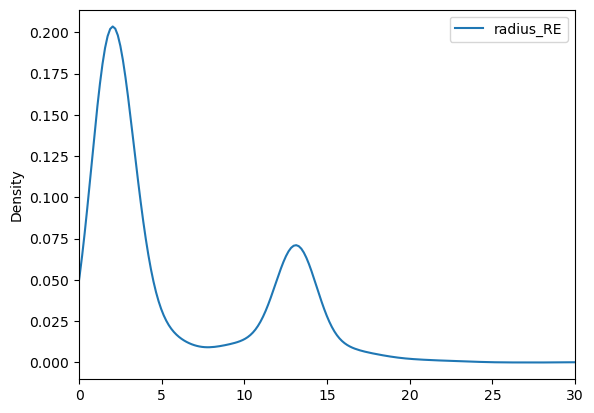

In [81]:
exos.plot(kind='kde',y='radius_RE',xlim=[0,30])

#### XIII. Time Series

1. Initialize a datetime index with 10 timestamps, 1 second apart, ending on midnight 1/1/2025. Use the `date_range()` function.

In [8]:
ts = pd.date_range(end='01/01/2025', freq='1s', periods=10)
print(ts)

DatetimeIndex(['2024-12-31 23:59:51', '2024-12-31 23:59:52',
               '2024-12-31 23:59:53', '2024-12-31 23:59:54',
               '2024-12-31 23:59:55', '2024-12-31 23:59:56',
               '2024-12-31 23:59:57', '2024-12-31 23:59:58',
               '2024-12-31 23:59:59', '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', freq='S')


#### XIV. The Categorical Data-type
Print the memory usage of the exoplanets DataFrame with `deep=True`. Then convert the `'planet_type'` and `'detection_method'` columns to `'category'` type and print the memory usage again. Each column should be <2% of its original size in memory.

In [36]:
exos.memory_usage(deep=True)

Index                449522
distance              41984
star_mag              41984
planet_type          313433
discovery_yr          41984
mass_ME               41984
radius_RE             41984
orbital_radius_AU     41984
orbital_period_yr     41984
eccentricity          41984
detection_method     306482
dtype: int64

In [37]:
exos['planet_type'] = exos['planet_type'].astype('category')
exos['detection_method'] = exos['detection_method'].astype('category')

In [38]:
exos.memory_usage(deep=True)

Index                449522
distance              41984
star_mag              41984
planet_type            5715
discovery_yr          41984
mass_ME               41984
radius_RE             41984
orbital_radius_AU     41984
orbital_period_yr     41984
eccentricity          41984
detection_method       6293
dtype: int64

#### XV. Numba demo
The example below doesn’t make much physical sense, but run it and compare the outputs of the 2 `timeit` lines. Try increasing or decreasing the number of samples or vary the number of numeric columns.

If you're on LUNARC and started Jupyter On Demand with the default number of tasks per node, you may have to restart it with 4 tasks per node given the number of threads in the example below.

In [16]:
import numba

In [17]:
numba.set_num_threads(4)
stuff =  df.iloc[:,4:9].sample(n=250000, replace=True, ignore_index=True)
%timeit stuff.rolling(500).mean()
%timeit stuff.rolling(500).mean(engine='numba', engine_kwargs={"parallel": True})

ValueError: The number of threads must be between 1 and 1